In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
tuition_summary_df = pd.read_csv('data/tuition_summary.csv')
tuition_summary_df = tuition_summary_df.rename(columns={"Average amount (in USD)":"Average Tuition & Feeds"})
tuition_summary_df["Academic Year Parsed"] = tuition_summary_df["Academic Year"].str.split("-").str[0]
tuition_summary_df["Academic Year Parsed"] = pd.to_datetime(tuition_summary_df["Academic Year Parsed"])

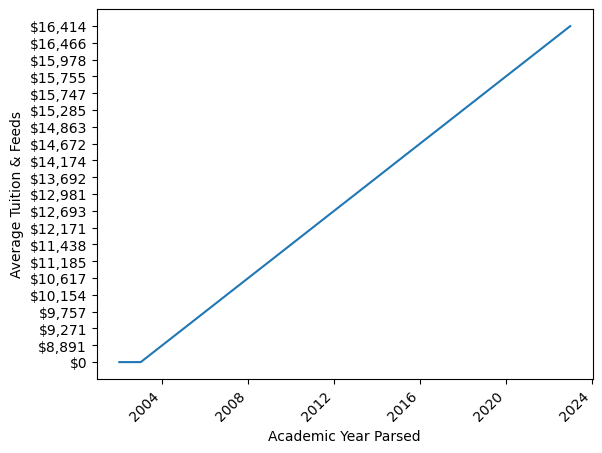

In [44]:
sns.lineplot(x=tuition_summary_df['Academic Year Parsed'], y=tuition_summary_df["Average Tuition & Feeds"])

plt.xticks(rotation=45, ha='right') 
plt.show()